In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
model_features_df = pd.read_csv('../data/model_features.csv')
transformed_data_men_df = pd.read_csv('../data/transformed_data_men_21_to_24.csv')

In [4]:
model_features_df = model_features_df.drop(columns=['Unnamed: 0'])

In [5]:
model_features_df.head()

,won,underdog,underdog_opp,fan_favorite,fan_favorite_opp,de,oe,te,pace,physicality_score,sos,srs,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,pf,tov,tov%,poss,ast_per_poss,ast_per_fg,tov_per_poss,ast_to_tov,poss_per_game,game_win_rate,de_opp,oe_opp,te_opp,pace_opp,physicality_score_opp,sos_opp,srs_opp,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,pf_opp,tov_opp,tov%_opp,poss_opp,ast_per_poss_opp,ast_per_fg_opp,tov_per_poss_opp,ast_to_tov_opp,poss_per_game_opp,game_win_rate_opp,conf_rank,conf_rank_opp,luck,luck_opp,choke_rate,choke_rate_opp,upset_rate,upset_rate_opp,3mean_plus_minus,3mean_plus_minus_opp,win_streak,win_streak_opp,matchup_win_rate
0,1,0,0,1,0,83.955939,105.172414,1.25271,72.0,9.405172,-6.37,6.27,27.103448,60.413793,0.449,7.62069,22.172414,0.344,13.896552,20.482759,0.678,11.344828,24.758621,36.103448,17.689655,9.724138,2.965517,19.103448,13.586207,16.2,39.074138,0.45272,0.652672,0.347703,1.30203,1.347384,0.827586,98.254994,103.126160,1.049577,67.0,8.390000,0.30,1.65,24.800000,56.640000,0.438,8.040000,23.000000,0.350,11.800000,16.920000,0.697,10.120000,25.760000,35.880000,11.800000,7.360000,2.52,17.240000,13.560000,17.3,36.277000,0.325275,0.475806,0.373791,0.870206,1.451080,0.520000,15.0,15.0,0.666667,0.000000,0.0,0.0,0.0,0.000000,14.333333,-3.333333,0,0,0.0
1,1,0,0,0,1,83.955939,105.172414,1.25271,72.0,9.405172,-6.37,6.27,27.103448,60.413793,0.449,7.62069,22.172414,0.344,13.896552,20.482759,0.678,11.344828,24.758621,36.103448,17.689655,9.724138,2.965517,19.103448,13.586207,16.2,39.074138,0.45272,0.652672,0.347703,1.30203,1.347384,0.827586,100.518548,106.741125,1.061905,69.0,9.027778,-8.22,-6.66,27.148148,59.888889,0.453,7.185185,21.222222,0.339,12.851852,17.111111,0.751,12.629630,21.851852,34.481481,13.222222,6.777778,2.00,17.481481,14.703704,17.8,37.350000,0.354009,0.487040,0.393673,0.899244,1.383333,0.518519,15.0,22.0,0.666667,0.571429,0.0,0.0,0.0,0.000000,14.333333,-0.333333,1,2,0.0
2,1,0,0,1,0,83.955939,105.172414,1.25271,72.0,9.405172,-6.37,6.27,27.103448,60.413793,0.449,7.62069,22.172414,0.344,13.896552,20.482759,0.678,11.344828,24.758621,36.103448,17.689655,9.724138,2.965517,19.103448,13.586207,16.2,39.074138,0.45272,0.652672,0.347703,1.30203,1.347384,0.827586,108.277778,93.500000,0.863520,72.0,7.550000,-2.09,-12.73,25.000000,59.760000,0.418,5.320000,15.880000,0.335,12.000000,17.440000,0.688,8.480000,25.640000,34.120000,9.440000,5.640000,3.00,18.840000,13.080000,16.1,37.884000,0.249182,0.377600,0.345264,0.721713,1.515360,0.200000,15.0,12.0,0.666667,0.444444,0.0,0.0,0.0,0.000000,14.333333,-5.666667,2,1,0.0
3,1,0,0,1,0,83.955939,105.172414,1.25271,72.0,9.405172,-6.37,6.27,27.103448,60.413793,0.449,7.62069,22.172414,0.344,13.896552,20.482759,0.678,11.344828,24.758621,36.103448,17.689655,9.724138,2.965517,19.103448,13.586207,16.2,39.074138,0.45272,0.652672,0.347703,1.30203,1.347384,0.827586,90.289855,106.304348,1.177368,69.0,8.287500,-3.02,-7.28,26.500000,56.450000,0.469,5.500000,14.550000,0.378,14.850000,20.600000,0.721,8.500000,23.450000,31.950000,14.700000,10.450000,2.65,19.550000,11.550000,14.8,39.335000,0.373713,0.554717,0.293632,1.272727,1.966750,0.500000,15.0,15.0,0.666667,0.000000,0.0,0.0,0.0,0.000000,14.333333,-10.333333,3,0,0.5
4,0,1,0,0,1,83.955939,105.172414,1.25271,72.0,9.405172,-6.37,6.27,27.103448,60.413793,0.449,7.62069,22.172414,0.344,13.896552,20.482759,0.678,11.344828,24.758621,36.103448,17.689655,9.724138,2.965517,19.103448,13.586207,16.2,39.074138,0.45272,0.652672,0.347703,1.30203,1.347384,0.827586,93.532338,107.309606,1.147300,67.0,8.353448,7.28,16.59,25.310345,57.655172,0.439,6.379310,18.034483,0.354,15.517241,21.862069,0.710,11.482759,23.482759,34.965517,13.000000,7.137931,4.00,17.310345,10.793103,13.7,35.005172,0.371374,0.513624,0.308329,1.204473,1.207075,0.620690,15.0,1.0,0.666667,0.333333,0.0,0.3,0.0,0.444444,13.666667,21.333333,4,2,0.0


In [6]:
print("Shape of the dataset:", model_features_df.shape)
print("\nData types:\n", model_features_df.dtypes)

Shape of the dataset: (38352, 82)

Data types:
 won                       int64
underdog                  int64
underdog_opp              int64
fan_favorite              int64
fan_favorite_opp          int64
                         ...   
3mean_plus_minus        float64
3mean_plus_minus_opp    float64
win_streak                int64
win_streak_opp            int64
matchup_win_rate        float64
Length: 82, dtype: object


In [7]:
summary_stats = model_features_df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                 won      underdog  underdog_opp  fan_favorite  \
count  38352.000000  38352.000000  38352.000000  38352.000000   
mean       0.499974      0.068758      0.068862      0.499296   
std        0.500007      0.253045      0.253223      0.500006   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000   

       fan_favorite_opp            de            oe            te  \
count      38352.000000  38352.000000  38352.000000  38352.000000   
mean           0.500026    102.074080    104.571383      1.028099   
std            0.500007      5.337890      6.294456      0.091367   
min            0.000000     83.955939     77.853881      0.625313   
25%            0.000000     98.345154    100.473

In [8]:
missing_values = model_features_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 won                     0
underdog                0
underdog_opp            0
fan_favorite            0
fan_favorite_opp        0
                       ..
3mean_plus_minus        0
3mean_plus_minus_opp    0
win_streak              0
win_streak_opp          0
matchup_win_rate        0
Length: 82, dtype: int64


In [9]:
correlation_matrix = model_features_df.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                            won  underdog  underdog_opp  fan_favorite  \
won                   1.000000 -0.134457      0.135833      0.256362   
underdog             -0.134457  1.000000     -0.073895     -0.034961   
underdog_opp          0.135833 -0.073895      1.000000      0.034878   
fan_favorite          0.256362 -0.034961      0.034878      1.000000   
fan_favorite_opp     -0.256362  0.035330     -0.034509     -0.998645   
...                        ...       ...           ...           ...   
3mean_plus_minus      0.270551  0.003843      0.273072      0.097212   
3mean_plus_minus_opp -0.271059  0.272556      0.003695     -0.099350   
win_streak            0.138490  0.015234      0.259762      0.023263   
win_streak_opp       -0.137568  0.257650      0.015081     -0.024748   
matchup_win_rate      0.436955 -0.125346      0.097884      0.073530   

                      fan_favorite_opp        de        oe        te  \
won                          -0.256362 -0.

In [10]:
model_features_df.columns

Index(['won', 'underdog', 'underdog_opp', 'fan_favorite', 'fan_favorite_opp',
       'de', 'oe', 'te', 'pace', 'physicality_score', 'sos', 'srs', 'fg',
       'fga', 'fg%', '3p', '3pa', '3p%', 'ft', 'fta', 'ft%', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'pf', 'tov', 'tov%', 'poss', 'ast_per_poss',
       'ast_per_fg', 'tov_per_poss', 'ast_to_tov', 'poss_per_game',
       'game_win_rate', 'de_opp', 'oe_opp', 'te_opp', 'pace_opp',
       'physicality_score_opp', 'sos_opp', 'srs_opp', 'fg_opp', 'fga_opp',
       'fg%_opp', '3p_opp', '3pa_opp', '3p%_opp', 'ft_opp', 'fta_opp',
       'ft%_opp', 'orb_opp', 'drb_opp', 'trb_opp', 'ast_opp', 'stl_opp',
       'blk_opp', 'pf_opp', 'tov_opp', 'tov%_opp', 'poss_opp',
       'ast_per_poss_opp', 'ast_per_fg_opp', 'tov_per_poss_opp',
       'ast_to_tov_opp', 'poss_per_game_opp', 'game_win_rate_opp', 'conf_rank',
       'conf_rank_opp', 'luck', 'luck_opp', 'choke_rate', 'choke_rate_opp',
       'upset_rate', 'upset_rate_opp', '3mean_plus_minus

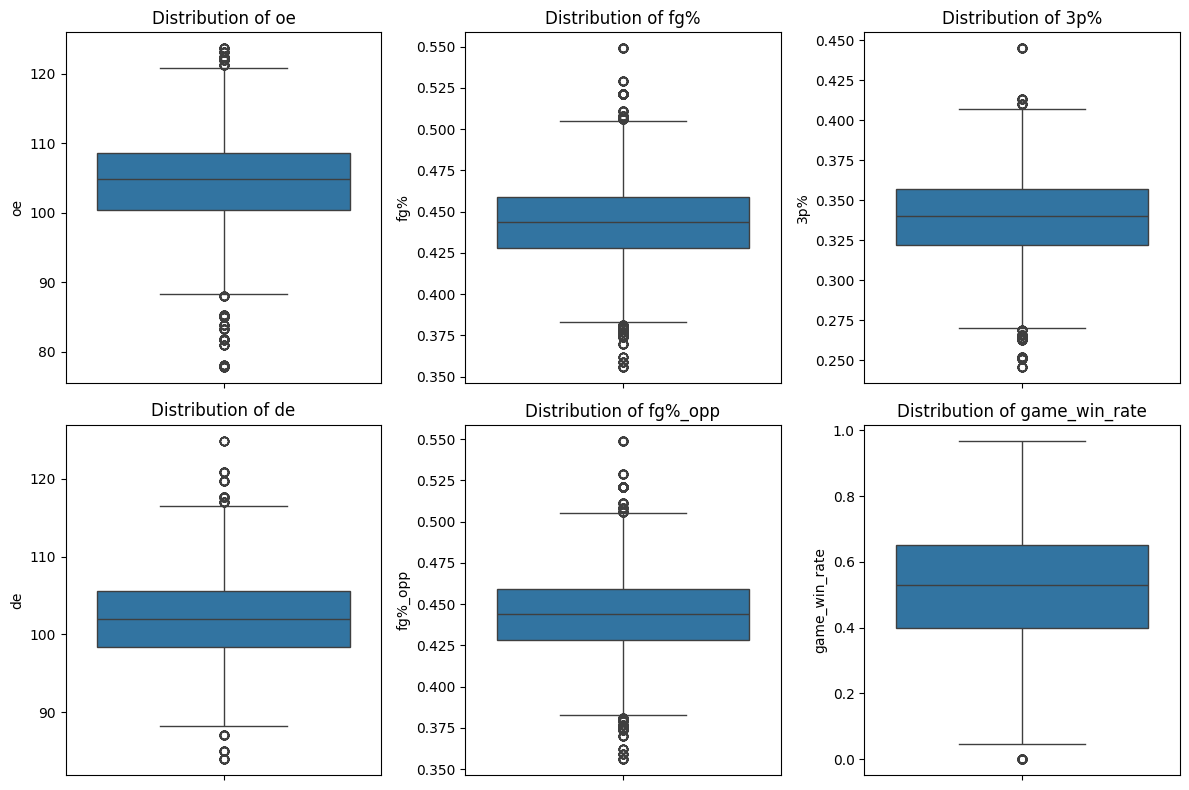

In [11]:
features_to_visualize = ['oe', 'fg%', '3p%', 'de', 'fg%_opp', 'game_win_rate']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_visualize):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=model_features_df[feature])
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


***JOIN Model features with transformed mens data***

In [12]:
model_features_path = '../data/model_features.csv'
transformed_data_men_path = '../data/transformed_data_men_21_to_24.csv'

model_features_updated_df = pd.read_csv(model_features_path)
transformed_data_men_updated_df = pd.read_csv(transformed_data_men_path)

if 'Unnamed: 0' in model_features_updated_df.columns:
    model_features_updated_df.drop('Unnamed: 0', axis=1, inplace=True)

if 'Unnamed: 0' in transformed_data_men_updated_df.columns:
    transformed_data_men_updated_df.drop('Unnamed: 0', axis=1, inplace=True)

redundant_columns = set(model_features_updated_df.columns).intersection(transformed_data_men_updated_df.columns)
joined_df = pd.concat([transformed_data_men_updated_df, model_features_updated_df.drop(redundant_columns, axis=1)], axis=1)

In [13]:
joined_df.to_csv('joined_dataset.csv')

In [14]:
joined_df.shape

(38352, 104)

In [15]:
joined_df.head()

,team,opponent,won,team_score,opponent_score,team_rank,opponent_rank,game_round,season_type,date,season_year,home_game,underdog,underdog_opp,fan_favorite,fan_favorite_opp,g,w,l,de,oe,te,pace,physicality_score,sos,srs,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,pf,tov,tov%,poss,ast_per_poss,ast_per_fg,tov_per_poss,ast_to_tov,poss_per_game,game_win_rate,g_opp,w_opp,l_opp,de_opp,oe_opp,te_opp,pace_opp,physicality_score_opp,sos_opp,srs_opp,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,pf_opp,tov_opp,tov%_opp,poss_opp,ast_per_poss_opp,ast_per_fg_opp,tov_per_poss_opp,ast_to_tov_opp,poss_per_game_opp,game_win_rate_opp,seed,conf,seed_opp,conf_opp,conf_rank,conf_rank_opp,plus_minus,luck,luck_opp,choke_rate,choke_rate_opp,upset_rate,upset_rate_opp,3mean_plus_minus,3mean_plus_minus_opp,win_streak,win_streak_opp,matchup_win_rate
0,Abilene Christian,East Tennessee State,1,70.0,47.0,NaN,NaN,NaN,regular_season,2020/11/25,2021,1,0,0,1,0,29.0,24.0,5.0,83.955939,105.172414,1.25271,72.0,9.405172,-6.37,6.27,27.103448,60.413793,0.449,7.62069,22.172414,0.344,13.896552,20.482759,0.678,11.344828,24.758621,36.103448,17.689655,9.724138,2.965517,19.103448,13.586207,16.2,39.074138,0.45272,0.652672,0.347703,1.30203,1.347384,0.827586,25.0,13.0,12.0,98.254994,103.126160,1.049577,67.0,8.390000,0.30,1.65,24.800000,56.640000,0.438,8.040000,23.000000,0.350,11.800000,16.920000,0.697,10.120000,25.760000,35.880000,11.800000,7.360000,2.52,17.240000,13.560000,17.3,36.277000,0.325275,0.475806,0.373791,0.870206,1.451080,0.520000,14.0,Slnd,NaN,SC,15.0,15.0,23.0,0.666667,0.000000,0.0,0.0,0.0,0.000000,14.333333,-3.333333,0,0,0.0
1,Abilene Christian,Austin Peay,1,80.0,72.0,NaN,NaN,NaN,regular_season,2020/11/27,2021,0,0,0,0,1,29.0,24.0,5.0,83.955939,105.172414,1.25271,72.0,9.405172,-6.37,6.27,27.103448,60.413793,0.449,7.62069,22.172414,0.344,13.896552,20.482759,0.678,11.344828,24.758621,36.103448,17.689655,9.724138,2.965517,19.103448,13.586207,16.2,39.074138,0.45272,0.652672,0.347703,1.30203,1.347384,0.827586,27.0,14.0,13.0,100.518548,106.741125,1.061905,69.0,9.027778,-8.22,-6.66,27.148148,59.888889,0.453,7.185185,21.222222,0.339,12.851852,17.111111,0.751,12.629630,21.851852,34.481481,13.222222,6.777778,2.00,17.481481,14.703704,17.8,37.350000,0.354009,0.487040,0.393673,0.899244,1.383333,0.518519,14.0,Slnd,NaN,ASun,15.0,22.0,8.0,0.666667,0.571429,0.0,0.0,0.0,0.000000,14.333333,-0.333333,1,2,0.0
2,Abilene Christian,Nebraska Omaha,1,70.0,58.0,NaN,NaN,NaN,regular_season,2020/11/28,2021,1,0,0,1,0,29.0,24.0,5.0,83.955939,105.172414,1.25271,72.0,9.405172,-6.37,6.27,27.103448,60.413793,0.449,7.62069,22.172414,0.344,13.896552,20.482759,0.678,11.344828,24.758621,36.103448,17.689655,9.724138,2.965517,19.103448,13.586207,16.2,39.074138,0.45272,0.652672,0.347703,1.30203,1.347384,0.827586,25.0,5.0,20.0,108.277778,93.500000,0.863520,72.0,7.550000,-2.09,-12.73,25.000000,59.760000,0.418,5.320000,15.880000,0.335,12.000000,17.440000,0.688,8.480000,25.640000,34.120000,9.440000,5.640000,3.00,18.840000,13.080000,16.1,37.884000,0.249182,0.377600,0.345264,0.721713,1.515360,0.200000,14.0,Slnd,NaN,Sum,15.0,12.0,12.0,0.666667,0.444444,0.0,0.0,0.0,0.000000,14.333333,-5.666667,2,1,0.0
3,Abilene Christian,Tarleton State,1,69.0,48.0,NaN,NaN,NaN,regular_season,2020/12/05,2021,1,0,0,1,0,29.0,24.0,5.0,83.955939,105.172414,1.25271,72.0,9.405172,-6.37,6.27,27.103448,60.413793,0.449,7.62069,22.172414,0.344,13.896552,20.482759,0.678,11.344828,24.758621,36.103448,17.689655,9.724138,2.965517,19.103448,13.586207,16.2,39.074138,0.45272,0.652672,0.347703,1.30203,1.347384,0.827586,20.0,10.0,10.0,90.289855,106.304348,1.177368,69.0,8.287500,-3.02,-7.28,26.500000,56.450000,0.469,5.500000,14.550000,0.378,14.850000,20.600000,0.721,8.500000,23.450000,31.950000,14.700000,10.450000,2.65,19.550000,11.550000,14.8,39.335000,0.373713,0.554717,0.293632,1.272727,1.966750,0.500000,14.0,Slnd,NaN,WAC,15.0,15.0,21.0,0.666667,0.000000,0.0,0.0,0.0,0.000

***Handle missing values***

In [16]:
missing_values = joined_df.isnull().any()
print("Missing Values:\n", dict(missing_values), '\n')
for k,v in joined_df.isnull().any().items():
    if v == True:
        print(k)

Missing Values:
 {'team': False, 'opponent': False, 'won': False, 'team_score': False, 'opponent_score': False, 'team_rank': True, 'opponent_rank': True, 'game_round': True, 'season_type': False, 'date': False, 'season_year': False, 'home_game': False, 'underdog': False, 'underdog_opp': False, 'fan_favorite': False, 'fan_favorite_opp': False, 'g': False, 'w': False, 'l': False, 'de': False, 'oe': False, 'te': False, 'pace': False, 'physicality_score': False, 'sos': False, 'srs': False, 'fg': False, 'fga': False, 'fg%': False, '3p': False, '3pa': False, '3p%': False, 'ft': False, 'fta': False, 'ft%': False, 'orb': False, 'drb': False, 'trb': False, 'ast': False, 'stl': False, 'blk': False, 'pf': False, 'tov': False, 'tov%': False, 'poss': False, 'ast_per_poss': False, 'ast_per_fg': False, 'tov_per_poss': False, 'ast_to_tov': False, 'poss_per_game': False, 'game_win_rate': False, 'g_opp': False, 'w_opp': False, 'l_opp': False, 'de_opp': False, 'oe_opp': False, 'te_opp': False, 'pace_opp'

***Correlation heatmap of important features***

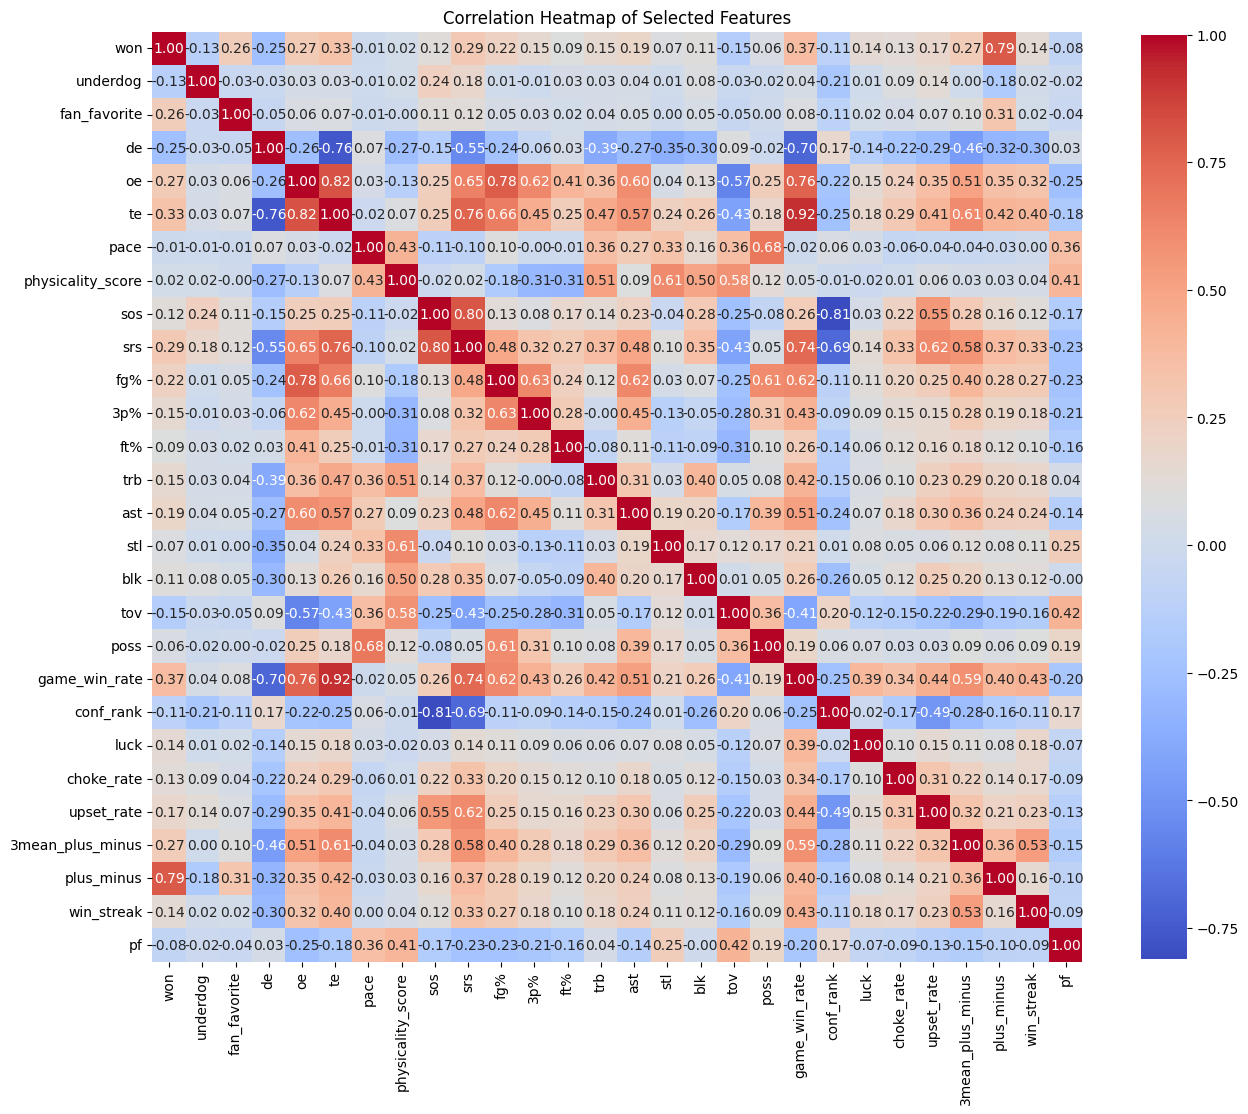

In [17]:
columns_for_heatmap = [
    'won', 'underdog', 'fan_favorite', 'de', 'oe', 'te', 'pace', 'physicality_score',
    'sos', 'srs', 'fg%', '3p%', 'ft%', 'trb', 'ast', 'stl', 'blk', 'tov', 'poss',
    'game_win_rate', 'conf_rank', 'luck', 'choke_rate', 'upset_rate', '3mean_plus_minus', 'plus_minus', 'win_streak', 'pf'
]

heatmap_df = joined_df[columns_for_heatmap]

corr_matrix = heatmap_df.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap of Selected Features")
plt.show()


***feature distribution analysis of important features***

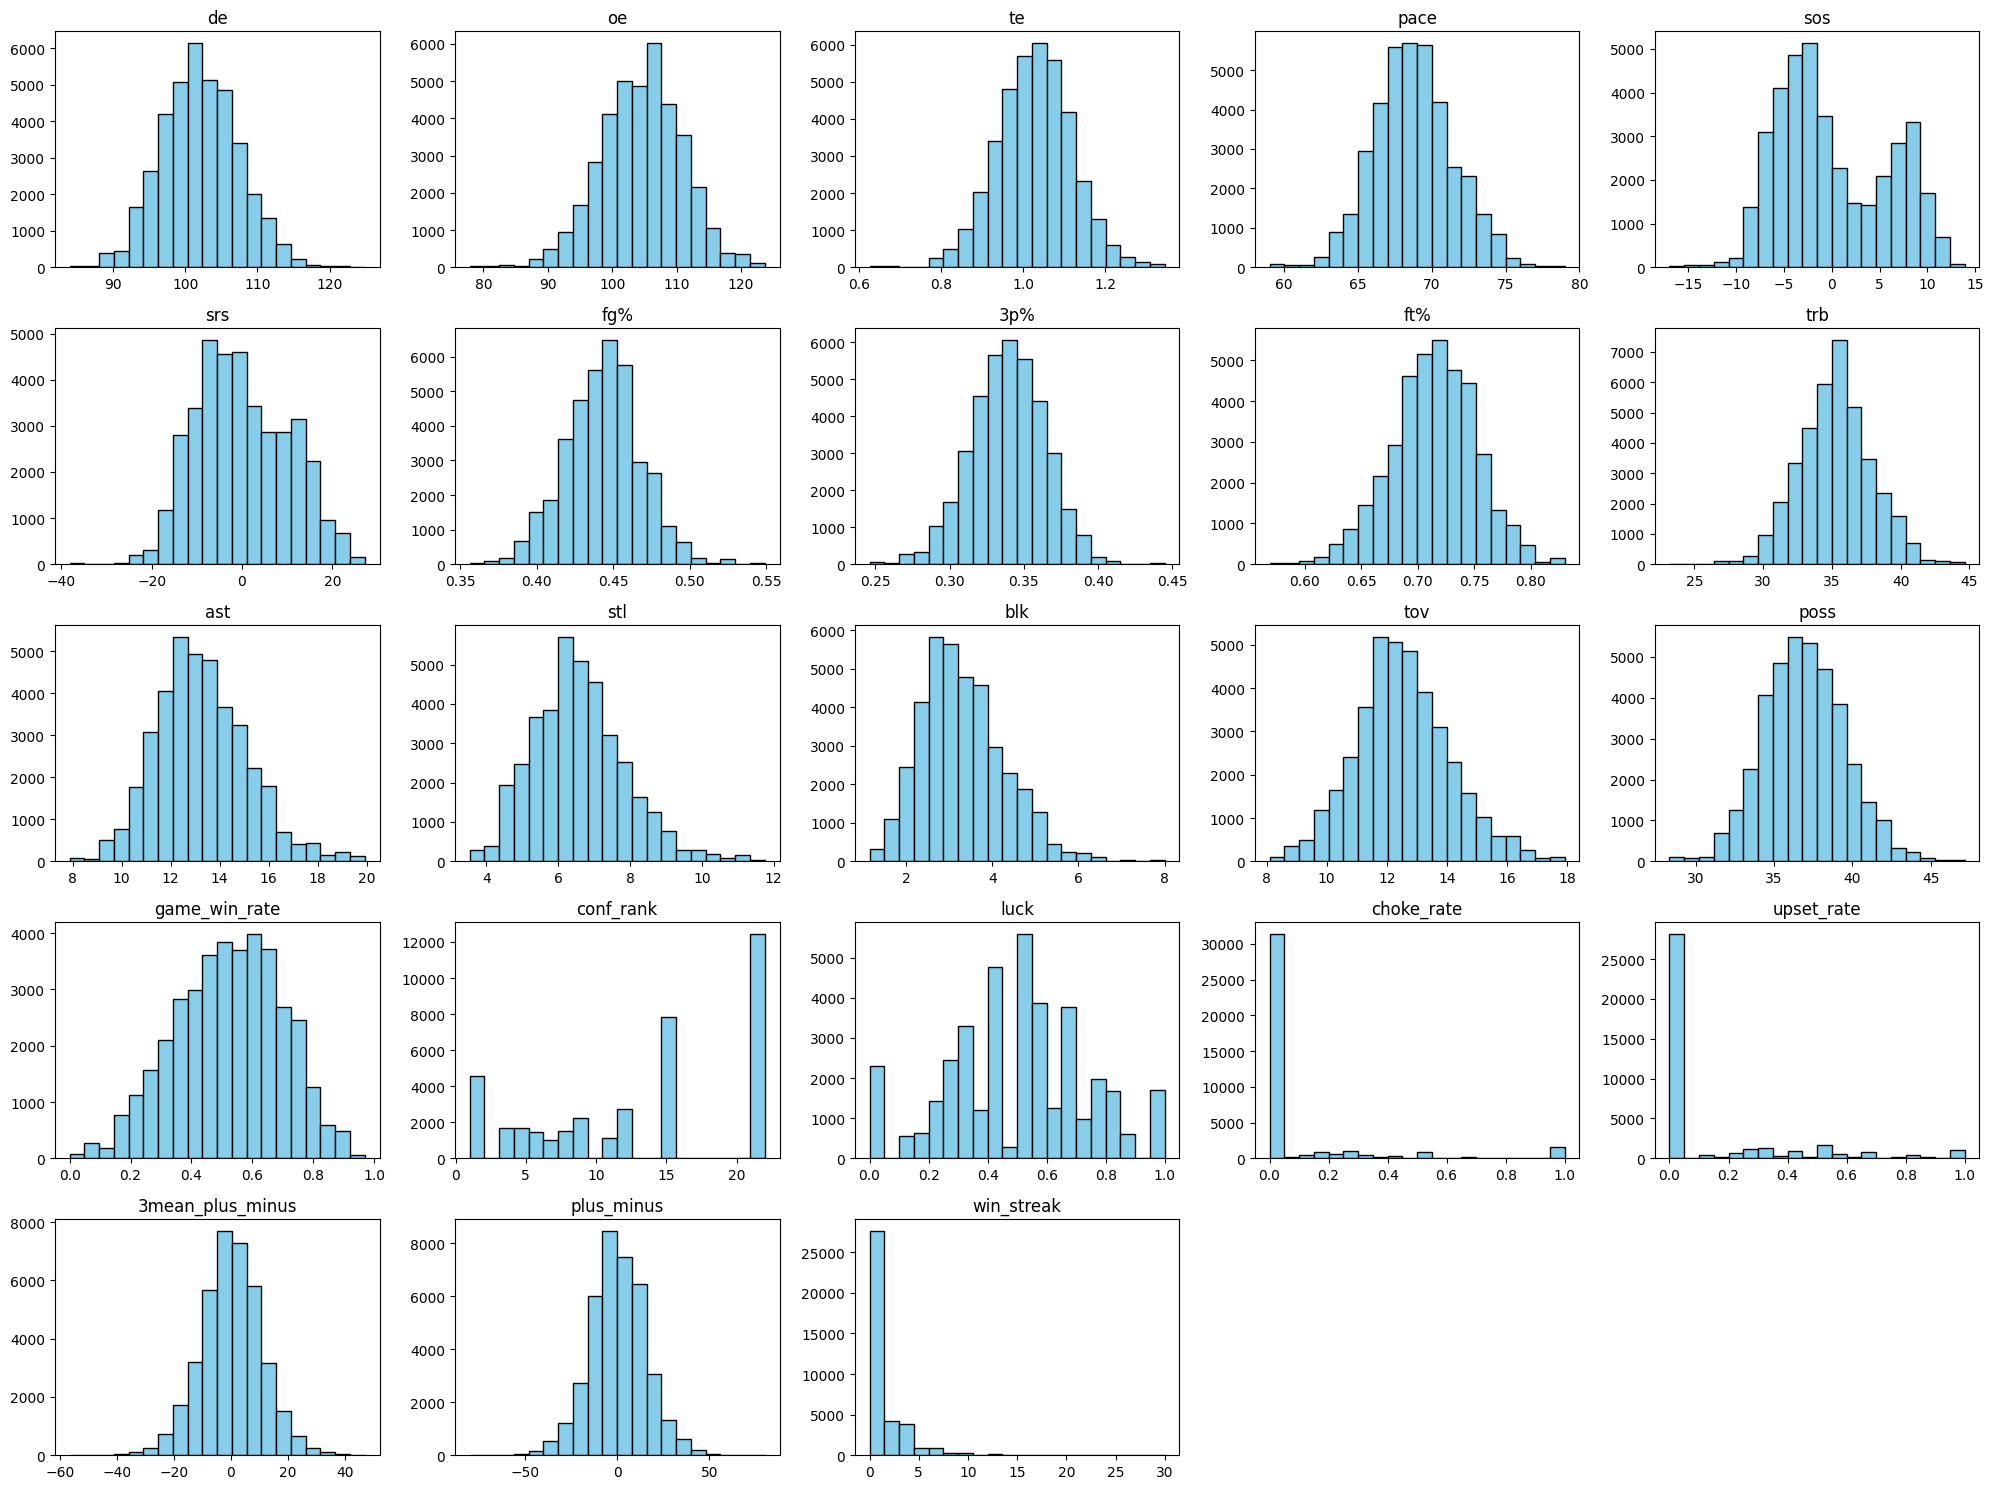

In [18]:
selected_features = [
    'de', 'oe', 'te', 'pace', 'sos', 'srs', 'fg%', '3p%', 'ft%', 'trb', 'ast', 'stl',
    'blk', 'tov', 'poss', 'game_win_rate', 'conf_rank', 'luck', 'choke_rate', 'upset_rate',
    '3mean_plus_minus', 'plus_minus', 'win_streak'
]

# Plotting histograms for each selected feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(5, 5, i)
    plt.hist(joined_df[feature].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(feature)

plt.tight_layout()
plt.show()
